In [8]:
from csv import reader
# Load a CSV file\n",
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

Cluster 0 contains 6774 samples
Cluster 1 contains 5634 samples


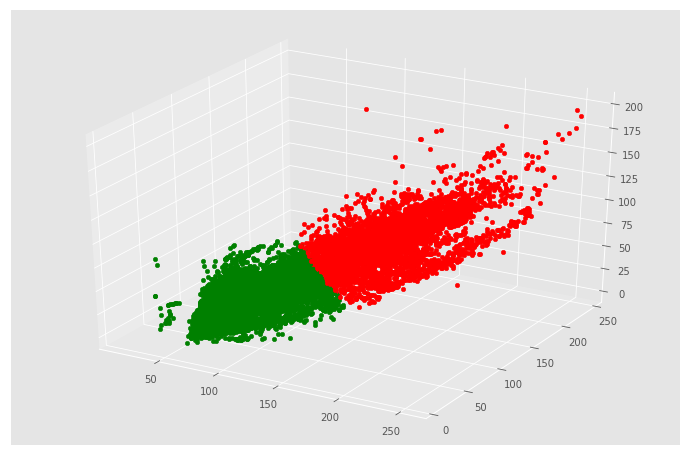

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
from pylab import *

data = load_csv("./female_natok_rgb.csv")
#data = eval(data)
myData = []
for i in range(0,len(data)):
    #print(data[i])
    try:
        r = eval(data[i][0])
        g = eval(data[i][1])
        b = eval(data[i][2])
        myData.append([])
        myData[i].append(r)
        myData[i].append(g)
        myData[i].append(b)
    except:
        continue
        
#print(myData)    
    
X = np.array(myData)


cluster_num = 5

kmeans = KMeans(n_clusters=cluster_num)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# print "centroids : "
# print centroids
# print "labels : "
# print labels

colors = ["g.","r.","c.","y."]

#color = np.random.rand(cluster_num)

color = ["g", "#FF0000", "b", "#FFFF00", "#ff33af"]

c = Counter(labels)


fig = figure(figsize=(12,8))
ax = fig.gca(projection='3d')


for i in range(len(X)):
#     print("coordinate:",X[i], "label:", labels[i])
#     print "i : ",i
#     print "color[labels[i]] : ",color[labels[i]]
    ax.scatter(X[i][0], X[i][1], X[i][2], c=color[labels[i]])


for cluster_number in range(cluster_num):
  print("Cluster {} contains {} samples".format(cluster_number, c[cluster_number]))

ax.scatter(centroids[:, 0],centroids[:, 1], centroids[:, 2], marker = "x", s=150, linewidths = 5, zorder = 100, c=color)
#ax.scatter(centroids[:, 0],centroids[:, 1], centroids[:, 2], marker = "x", s=150, linewidths = 5, zorder = 100)

plt.show()